# Bitcoin dataset analysis

## Data Cleaning
---

#### Loading bitcoin dataset from 2018

In [191]:
import pandas as pd
import pandas_bokeh

# set pandas_bokeh to output inline
pandas_bokeh.output_notebook()

bitcoin_2018 = pd.read_csv("datasets/BTC-2018min.csv")
bitcoin_2018.head()

Loading BokehJS ...

,unix,date,symbol,open,high,low,close,Volume BTC,Volume USD
0,1546300740,2018-12-31 23:59:00,BTC/USD,3689.26,3693.30,3689.26,3693.30,9.838855,36337.841473
1,1546300680,2018-12-31 23:58:00,BTC/USD,3689.26,3691.35,3689.26,3691.35,0.560000,2067.156000
2,1546300620,2018-12-31 23:57:00,BTC/USD,3688.83,3689.26,3688.83,3689.26,0.560833,2069.059602
3,1546300560,2018-12-31 23:56:00,BTC/USD,3687.87,3689.65,3686.92,3686.92,7.610240,28058.346208
4,1546300500,2018-12-31 23:55:00,BTC/USD,3688.28,3688.85,3685.00,3688.85,7.665703,28277.629729


#### About each Column:

- <strong>Unix Timestamp</strong> - This is the unix timestamp or also known as "Epoch Time". Use this to convert to your local timezone
- <strong>Date</strong> - This timestamp is UTC Timezone
- <strong>Symbol</strong> - The symbol for which the timeseries data refers
- <strong>Open</strong> - This is the opening price of the time period
- <strong>High</strong> - This is the highest price of the time period
- <strong>Low</strong> - This is the lowest price of the time period
- <strong>Close</strong> - This is the closing price of the time period
- <strong>Volume BTC</strong> - This is the volume that was transacted 
- <strong>Volume USD</strong> - This is the volume in the base/converted

#### Remove unecessary columns

In [192]:
bitcoin_2018 = bitcoin_2018.drop(['unix'], axis = 1)
bitcoin_2018 = bitcoin_2018.drop(['symbol'], axis = 1)

#### Index by date

In [193]:
bitcoin_2018['date'] = pd.to_datetime(bitcoin_2018['date'])
bitcoin_2018 = bitcoin_2018.set_index('date')

#### Reverse row order (From oldest to newest)

In [194]:
bitcoin_2018 = bitcoin_2018.iloc[::-1]
bitcoin_2018.head()

,open,high,low,close,Volume BTC,Volume USD
date,,,,,,
2018-01-01 00:01:00,13841.01,13890.43,13841.01,13890.43,1.665850,23139.366704
2018-01-01 00:02:00,13846.64,13890.35,13846.64,13847.51,0.269346,3729.768382
2018-01-01 00:03:00,13847.51,13874.92,13823.19,13823.19,1.155274,15969.574078
2018-01-01 00:04:00,13823.19,13826.75,13803.20,13803.20,0.646691,8926.403003
2018-01-01 00:05:00,13826.10,13826.10,13734.45,13737.93,38.030409,522459.100423


#### Change column names

In [195]:
bitcoin_2018.rename(columns = {'Volume BTC': 'bitcoin', 'Volume USD': 'euro'}, inplace = True)
bitcoin_2018.head()

,open,high,low,close,bitcoin,euro
date,,,,,,
2018-01-01 00:01:00,13841.01,13890.43,13841.01,13890.43,1.665850,23139.366704
2018-01-01 00:02:00,13846.64,13890.35,13846.64,13847.51,0.269346,3729.768382
2018-01-01 00:03:00,13847.51,13874.92,13823.19,13823.19,1.155274,15969.574078
2018-01-01 00:04:00,13823.19,13826.75,13803.20,13803.20,0.646691,8926.403003
2018-01-01 00:05:00,13826.10,13826.10,13734.45,13737.93,38.030409,522459.100423


#### Convert USD columns to Euro (1 USD = 0.924428 EUR)

In [196]:
bitcoin_2018['open'] = bitcoin_2018['open'] * 0.924428
bitcoin_2018['close'] = bitcoin_2018['close'] * 0.924428
bitcoin_2018['high'] = bitcoin_2018['high'] * 0.924428
bitcoin_2018['low'] = bitcoin_2018['low'] * 0.924428
bitcoin_2018['euro'] = bitcoin_2018['euro'] * 0.924428

#### Describe dataframe

In [197]:
bitcoin_2018.describe()

,open,high,low,close,bitcoin,euro
count,525599.000000,525599.000000,525599.000000,525599.000000,525599.000000,5.255990e+05
mean,6956.112442,6961.189089,6950.673888,6956.089710,7.474384,5.403027e+04
std,2226.104552,2229.875668,2221.974645,2226.061106,17.935785,1.314561e+05
min,2888.329065,2895.179076,2886.323056,2888.329065,0.000000,0.000000e+00
25%,5888.236589,5890.131666,5885.897786,5888.282810,0.404663,2.563584e+03
50%,6381.002934,6385.366234,6377.564062,6380.965957,2.082416,1.376955e+04
75%,7928.879044,7936.893835,7920.203287,7928.818956,7.045175,4.923328e+04
max,15932.498091,15932.507336,15913.991043,15932.498091,747.429670,5.073933e+06


#### Info dataframe

In [198]:
bitcoin_2018.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 525599 entries, 2018-01-01 00:01:00 to 2018-12-31 23:59:00
Data columns (total 6 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   open     525599 non-null  float64
 1   high     525599 non-null  float64
 2   low      525599 non-null  float64
 3   close    525599 non-null  float64
 4   bitcoin  525599 non-null  float64
 5   euro     525599 non-null  float64
dtypes: float64(6)
memory usage: 28.1 MB


## Resampling
---

#### Daily resample

In [199]:
# Get the max value and compare it from now on
max_daily_bitcoin_2018 = bitcoin_2018['high'].resample('D').max()
max_daily_bitcoin_2018

date
2018-01-01    12888.144069
2018-01-02    14104.487943
2018-01-03    14328.634000
2018-01-04    14264.173636
2018-01-05    15900.161600
                  ...     
2018-12-27     3550.885101
2018-12-28     3669.979160
2018-12-29     3662.445072
2018-12-30     3577.536360
2018-12-31     3552.475117
Freq: D, Name: high, Length: 365, dtype: float64

#### Weekly resample

In [200]:
max_weekly_bitcoin_2018 = bitcoin_2018['high'].resample('W').max()
max_weekly_bitcoin_2018

date
2018-01-07    15932.507336
2018-01-14    15068.176400
2018-01-21    13306.549426
2018-01-28    11083.105956
2018-02-04    10926.748204
2018-02-11     8403.790062
2018-02-18    10446.036400
2018-02-25    10889.761840
2018-03-04    10641.090708
2018-03-11    10804.714464
2018-03-18     9144.441776
2018-03-25     8493.736907
2018-04-01     7857.638000
2018-04-08     6939.533088
2018-04-15     7780.910476
2018-04-22     8353.612111
2018-04-29     9018.285087
2018-05-06     9197.115683
2018-05-13     8906.401566
2018-05-20     8228.241185
2018-05-27     7940.004535
2018-06-03     7201.931975
2018-06-10     7177.665740
2018-06-17     6397.014027
2018-06-24     6324.760735
2018-07-01     6018.026280
2018-07-08     6304.598960
2018-07-15     6299.717980
2018-07-22     7115.211385
2018-07-29     7854.827739
2018-08-05     7668.130260
2018-08-12     6616.990914
2018-08-19     6127.570998
2018-08-26     6384.848555
2018-09-02     6780.217166
2018-09-09     6851.721672
2018-09-16     6089.207

#### Monthly resample

In [201]:
max_monthly_bitcoin_2018 = bitcoin_2018['high'].resample('M').max()
max_monthly_bitcoin_2018


date
2018-01-31    15932.507336
2018-02-28    10889.761840
2018-03-31    10804.714464
2018-04-30     9018.285087
2018-05-31     9197.115683
2018-06-30     7201.931975
2018-07-31     7854.827739
2018-08-31     7175.003388
2018-09-30     6851.721672
2018-10-31     6245.435568
2018-11-30     6049.456832
2018-12-31     3942.685420
Freq: M, Name: high, dtype: float64

## Data visualization
---

In [202]:
max_daily_bitcoin_2018.plot_bokeh(figsize=(1200,600), legend="top_left", ylabel="Daily max", xlabel="Date", title="Daily max year overview bitcoin 2017")

Figure(id='4039', ...)

In [203]:
max_weekly_bitcoin_2018.plot_bokeh(figsize=(1200,600), legend="top_left", ylabel="Weekly max", xlabel="Date", title="Weekly max year overview bitcoin 2017")

Figure(id='4236', ...)

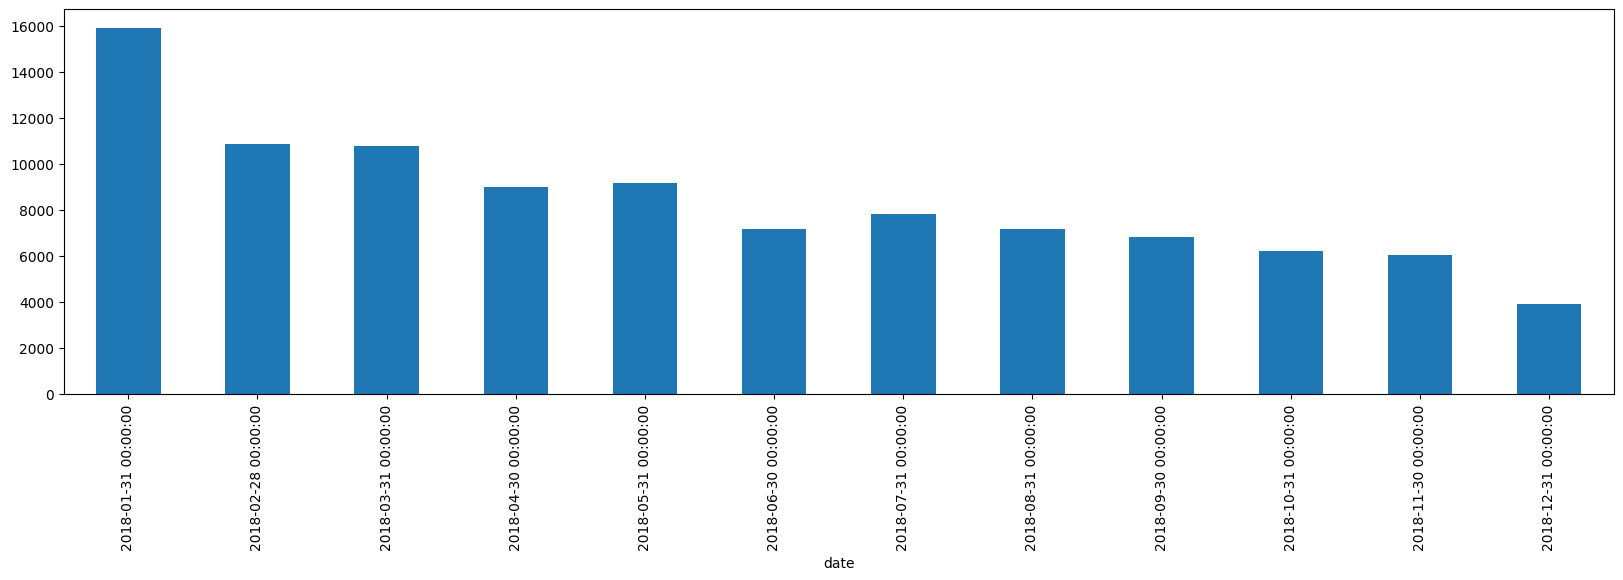

In [204]:
from bokeh.plotting import figure, show

max_monthly_bitcoin_2018.plot(kind='bar', figsize=(20, 5))

# https://docs.bokeh.org/en/latest/docs/user_guide/basic/bars.html#bars
p = figure(width=1200, height=600)
p.vbar(x=max_monthly_bitcoin_2018.index.tolist(), top=max_monthly_bitcoin_2018.tolist(), color="blue")
show(p)

#### Day with max and min price in each month

In [205]:
monthly_max_bitcoin_2018 = bitcoin_2018['high'].resample('M').max()

maxDaily = []
for col in monthly_max_bitcoin_2018:
    maxDaily.append(max_daily_bitcoin_2018[max_daily_bitcoin_2018 == col])
    
pd.DataFrame(maxDaily).transpose()

,high,high,high,high,high,high,high,high,high,high,high,high
date,,,,,,,,,,,,
2018-01-06,15932.507336,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-02-20,NaN,10889.76184,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-03-05,NaN,NaN,10804.714464,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-04-25,NaN,NaN,NaN,9018.285087,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-05-05,NaN,NaN,NaN,NaN,9197.115683,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-06-03,NaN,NaN,NaN,NaN,NaN,7201.931975,NaN,NaN,NaN,NaN,NaN,NaN
2018-07-24,NaN,NaN,NaN,NaN,NaN,NaN,7854.827739,NaN,NaN,NaN,NaN,NaN
2018-08-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7175.003388,NaN,NaN,NaN,NaN
2018-09-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6851.721672,NaN,NaN,NaN


In [206]:
monthly_min_bitcoin_2018 = bitcoin_2018['high'].resample('M').min()
min_daily_bitcoin_2018 = bitcoin_2018['high'].resample('D').min()

minDaily = []
for col in monthly_min_bitcoin_2018:
    minDaily.append(min_daily_bitcoin_2018[min_daily_bitcoin_2018 == col])
    
pd.DataFrame(minDaily).transpose()

,high,high,high,high,high,high,high,high,high,high,high,high
date,,,,,,,,,,,,
2018-01-17,8578.996901,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-02-06,NaN,5523.512766,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-03-30,NaN,NaN,6101.2248,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-04-01,NaN,NaN,NaN,5952.60451,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-05-29,NaN,NaN,NaN,NaN,6533.154539,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-06-24,NaN,NaN,NaN,NaN,NaN,5360.600819,NaN,NaN,NaN,NaN,NaN,NaN
2018-07-12,NaN,NaN,NaN,NaN,NaN,NaN,5644.612834,NaN,NaN,NaN,NaN,NaN
2018-08-14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5457.841401,NaN,NaN,NaN,NaN
2018-09-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5674.028133,NaN,NaN,NaN


## External data
---

#### Loading ethereum dataset

In [207]:
ethereum_dataset = pd.read_csv("datasets/ETH-USD.csv")
ethereum_dataset.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-11-09,308.644989,329.451996,307.056000,320.884003,320.884003,893249984
1,2017-11-10,320.670990,324.717987,294.541992,299.252991,299.252991,885985984
2,2017-11-11,298.585999,319.453003,298.191986,314.681000,314.681000,842300992
3,2017-11-12,314.690002,319.153015,298.513000,307.907990,307.907990,1613479936
4,2017-11-13,307.024994,328.415009,307.024994,316.716003,316.716003,1041889984


#### Remove unecessary columns

In [208]:
ethereum_dataset = ethereum_dataset.drop(['Adj Close'], axis = 1)

#### Rename columns

In [209]:
ethereum_dataset.rename(columns = {'Date': 'date', 'Open': 'open', 'High': 'high', 'Low': 'low', 'Close': 'close', 'Volume': 'ethereum' }, inplace = True)

#### Index by date

In [210]:
ethereum_dataset['date'] = pd.to_datetime(ethereum_dataset['date'])
ethereum_dataset = ethereum_dataset.set_index('date')

In [211]:
ethereum_2018 = ethereum_dataset.loc[(ethereum_dataset.index >= '2018-01-01') & (ethereum_dataset.index <= '2018-12-31')].copy()

#### Convert USD columns to Euro (1 USD = 0.924428 EUR)

In [212]:
ethereum_2018['open'] = ethereum_2018['open'] * 0.924428
ethereum_2018['close'] = ethereum_2018['close'] * 0.924428
ethereum_2018['high'] = ethereum_2018['high'] * 0.924428
ethereum_2018['low'] = ethereum_2018['low'] * 0.924428

#### Aggregate bitcoin and ethereum data and remove unused columns 

In [213]:
bitcoin_2018 = bitcoin_2018.drop(['open', 'low', 'close', 'euro'], axis = 1)
bitcoin_2018.rename(columns = {'high': 'bitcoin price', 'bitcoin': 'bitcoin volume'}, inplace = True)

In [214]:
# Add new bitcoin total price column (euro)
bitcoin_2018['bitcoin total price'] = bitcoin_2018['bitcoin price'] * bitcoin_2018['bitcoin volume']

In [215]:
# Get last row for group
bitcoin_2018 = bitcoin_2018.resample('D').apply(lambda x : x.iloc[-1])

In [216]:
ethereum_2018 = ethereum_2018.drop(['open', 'low', 'close'], axis = 1)
ethereum_2018.rename(columns = {'high': 'ethereum price', 'ethereum': 'ethereum volume'}, inplace = True)

In [217]:
# Add new ethereum total price column (euro)
ethereum_2018['ethereum total price'] = ethereum_2018['ethereum price'] * ethereum_2018['ethereum volume']

In [218]:
ethereum_2018

,ethereum price,ethereum volume,ethereum total price
date,,,
2018-01-01,723.392670,2595760128,1.877754e+12
2018-01-02,845.694483,5783349760,4.890947e+12
2018-01-03,900.828285,5093159936,4.588063e+12
2018-01-04,966.101174,6502859776,6.282420e+12
2018-01-05,994.120641,6683149824,6.643857e+12
...,...,...,...
2018-12-27,122.650392,2612804378,3.204615e+11
2018-12-28,127.244758,3130201009,3.983017e+11
2018-12-29,135.922653,3169029972,4.307430e+11


In [219]:
dataframe = pd.concat([bitcoin_2018, ethereum_2018], axis=1)
dataframe.round(decimals=2)

,bitcoin price,bitcoin volume,bitcoin total price,ethereum price,ethereum volume,ethereum total price
date,,,,,,
2018-01-01,12427.83,7.75,96373.33,723.39,2595760128,1.877754e+12
2018-01-02,13575.23,126.69,1719797.42,845.69,5783349760,4.890947e+12
2018-01-03,14024.05,6.23,87379.37,900.83,5093159936,4.588063e+12
2018-01-04,14014.32,1.34,18742.40,966.10,6502859776,6.282420e+12
2018-01-05,15650.57,5.50,86112.26,994.12,6683149824,6.643857e+12
...,...,...,...,...,...,...
2018-12-27,3320.26,1.75,5796.58,122.65,2612804378,3.204615e+11
2018-12-28,3593.09,5.68,20394.90,127.24,3130201009,3.983017e+11
2018-12-29,3443.94,9.74,33543.73,135.92,3169029972,4.307430e+11


In [220]:
# Plot the price between bitcoin and ethereum
price = dataframe[['bitcoin price', 'ethereum price']]
price.plot_bokeh(figsize=(1200,600), legend="top_right", ylabel="Price", xlabel="Date", title="Price between bitcoin and ethereum")

Figure(id='4599', ...)

In [221]:
# Plot the transacted volume between bitcoin and ethereum
volume = dataframe[['bitcoin volume', 'ethereum volume']]
volume.plot_bokeh(figsize=(1200,600), legend="top_right", ylabel="Volume", xlabel="Date", title="Transacted volume between bitcoin and ethereum")

Figure(id='4895', ...)

In [222]:
# Plot the total price between bitcoin and ethereum
volume = dataframe[['bitcoin total price', 'ethereum total price']]
volume.plot_bokeh(figsize=(1200,600), legend="top_right", ylabel="Total", xlabel="Date", title="Total price between bitcoin and ethereum")

Figure(id='5214', ...)

#### Conclusion

Even the bitcoin being more popular and more expensive overall, the transactions with ethereum were way superior in terms of sold values.

## Data analysis
---

#### Moving average smoothing

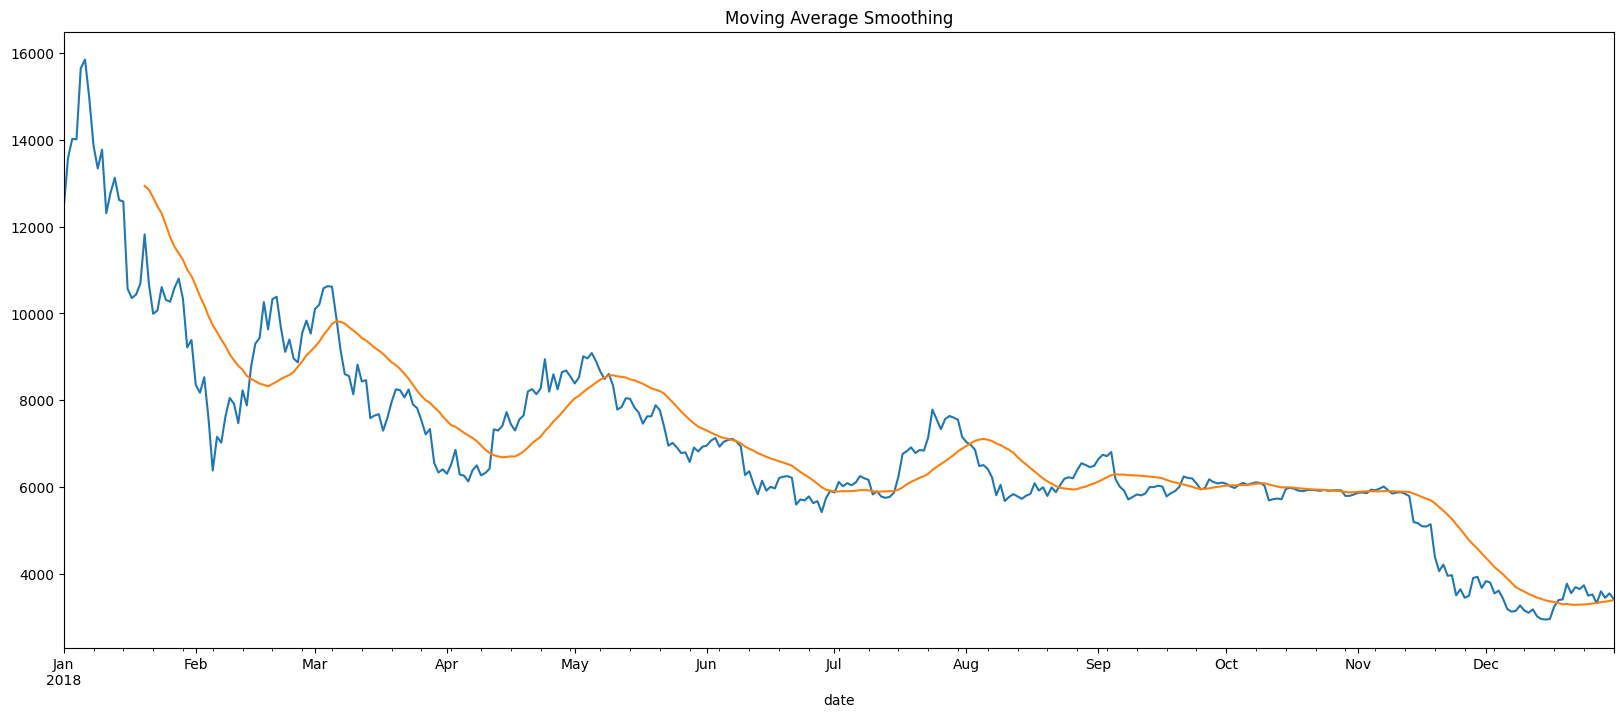

In [223]:
# Moving average window size 20
window_size_20 = 20
mean_20_bitcoin_2018 = bitcoin_2018['bitcoin price'].rolling(window_size_20).mean()
plot_original = bitcoin_2018['bitcoin price'].plot(figsize=(20,8), title='Moving Average Smoothing')
plot_mean_20 = mean_20_bitcoin_2018.plot(ax=plot_original)

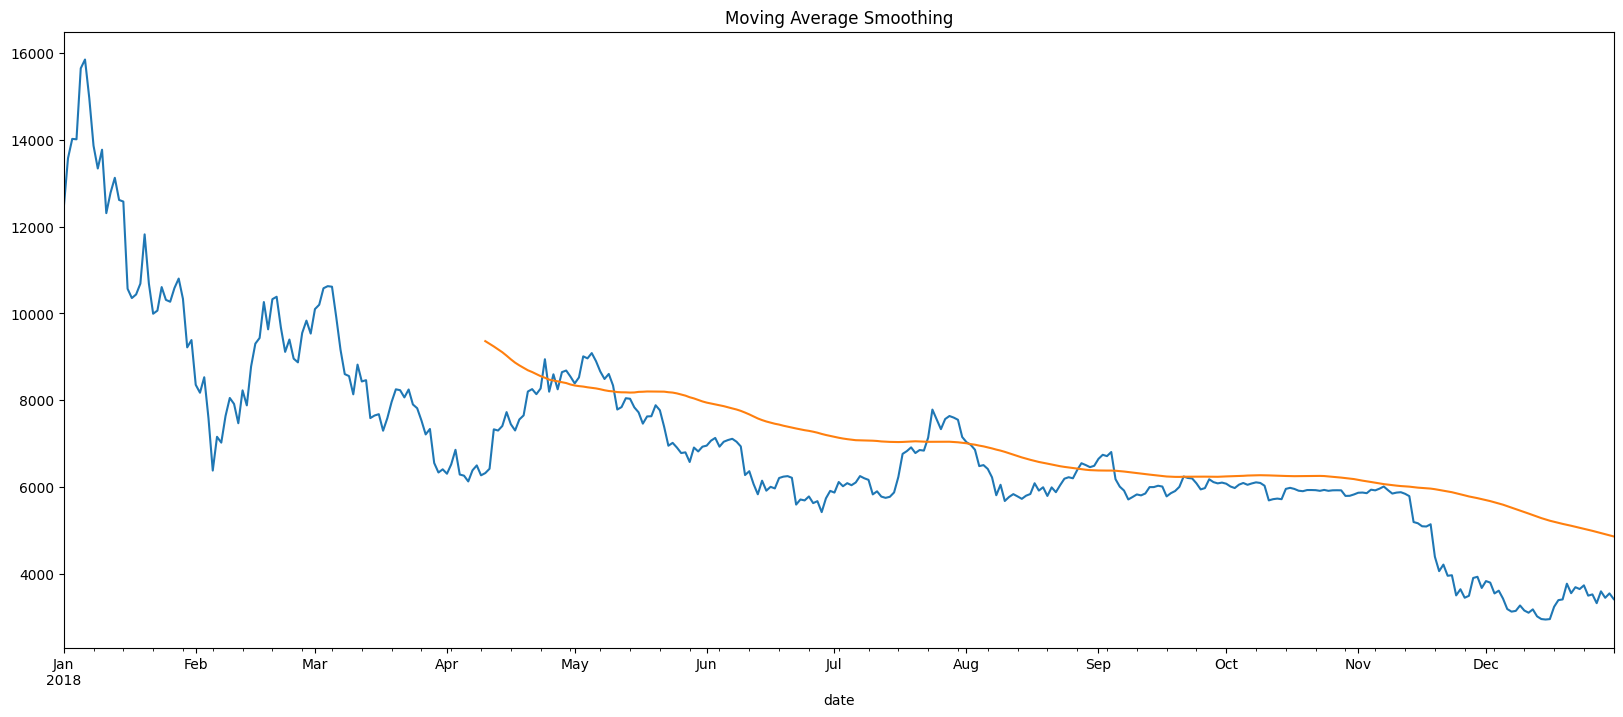

In [224]:
# Moving average window size 100
window_size_100 = 100
mean_100_bitcoin_2018 = bitcoin_2018['bitcoin price'].rolling(window_size_100).mean()
plot_original = bitcoin_2018['bitcoin price'].plot(figsize=(20,8), title='Moving Average Smoothing')
plot_mean_100 = mean_100_bitcoin_2018.plot(ax=plot_original)

### Exponential smoothing

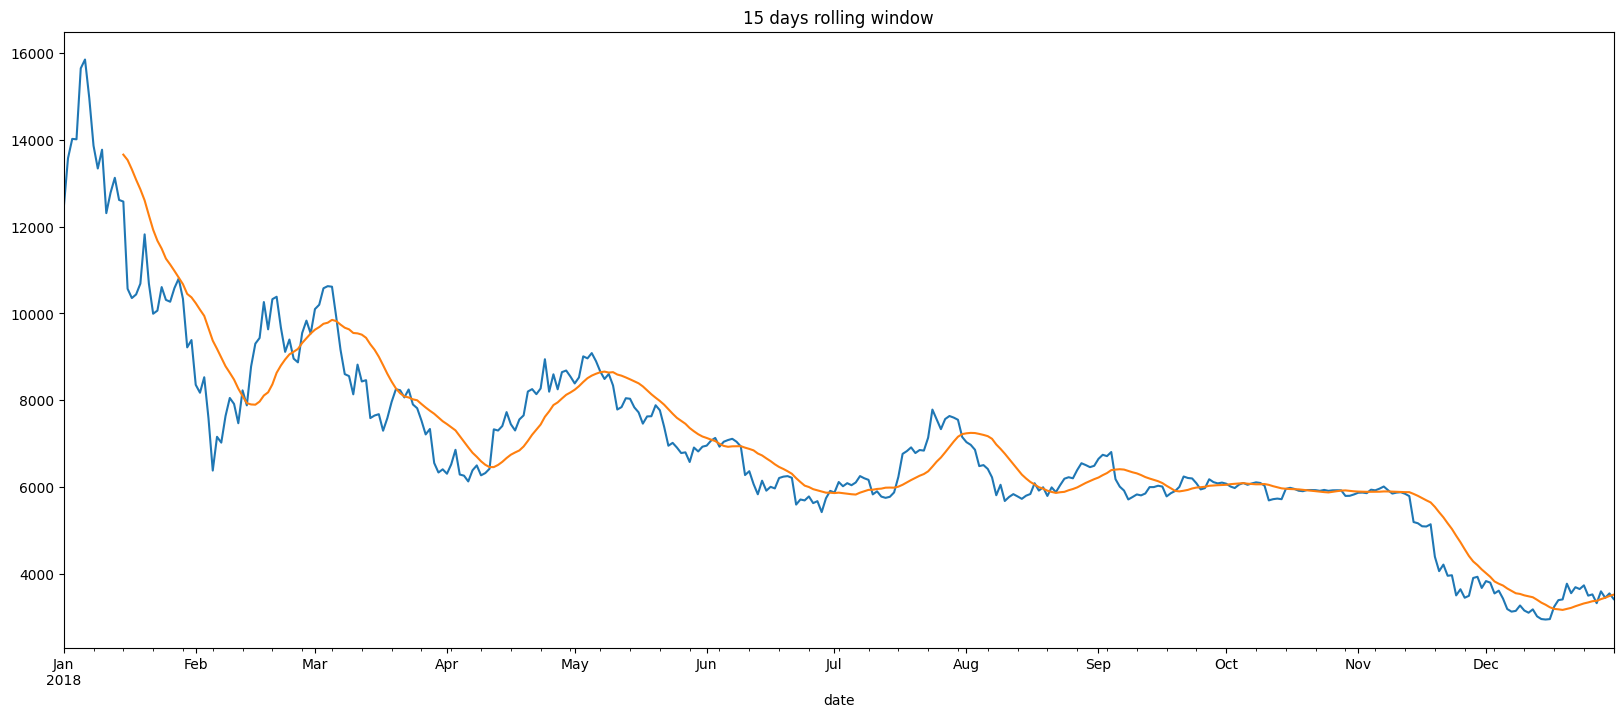

In [225]:
# 7 days window size
bitcoin_7_days = bitcoin_2018['bitcoin price'].rolling(window=15).mean()
plot_original = bitcoin_2018['bitcoin price'].plot(figsize=(20,8), title='Exponential smoothing')
plot_bitcoin_7_days = bitcoin_7_days.plot(figsize=(20,8), title='15 days rolling window')


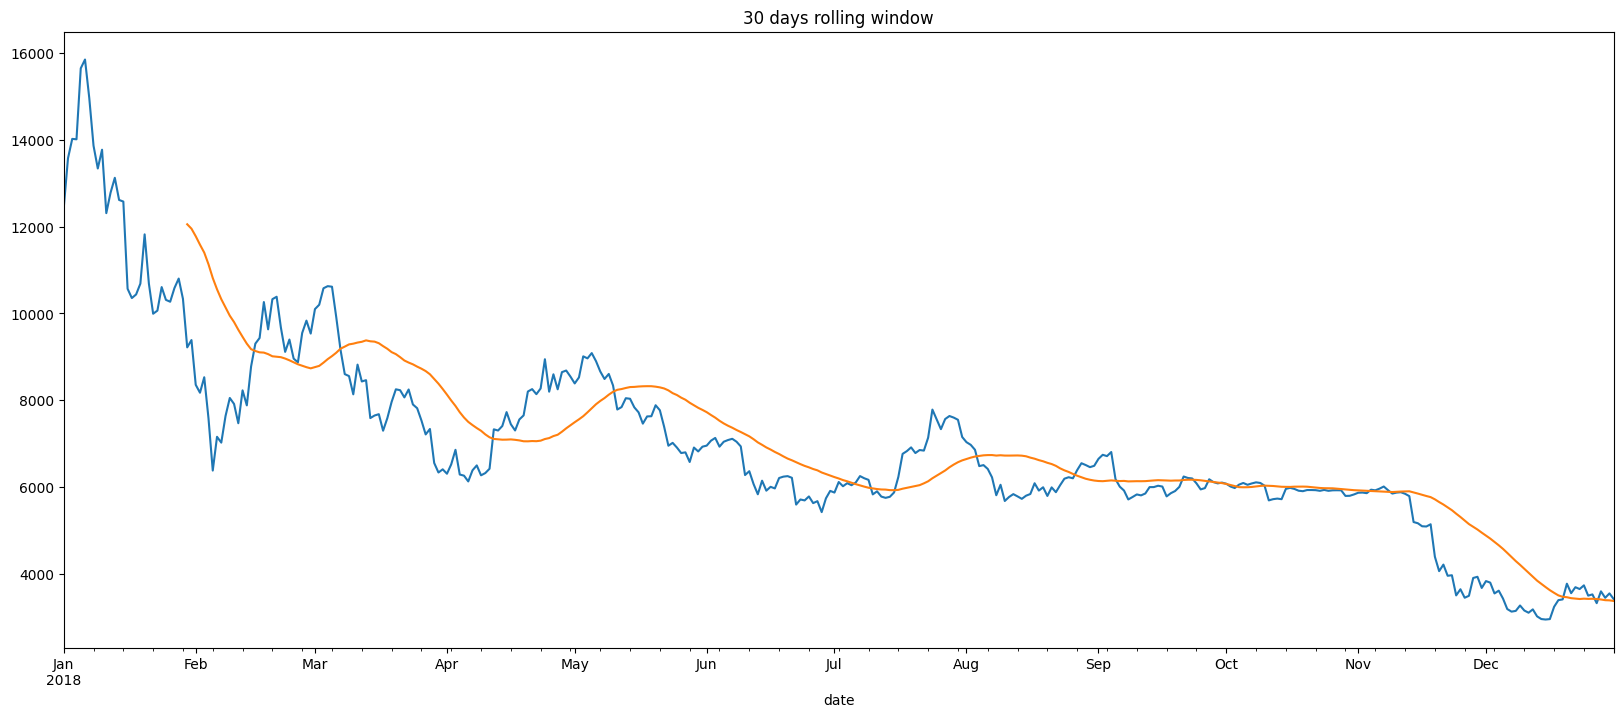

In [226]:
# 30 days window size
bitcoin_30_days = bitcoin_2018['bitcoin price'].rolling(window=30).mean()
plot_original = bitcoin_2018['bitcoin price'].plot(figsize=(20,8), title='Exponential smoothing')
plot_bitcoin_30_days = bitcoin_30_days.plot(figsize=(20,8), title='30 days rolling window')

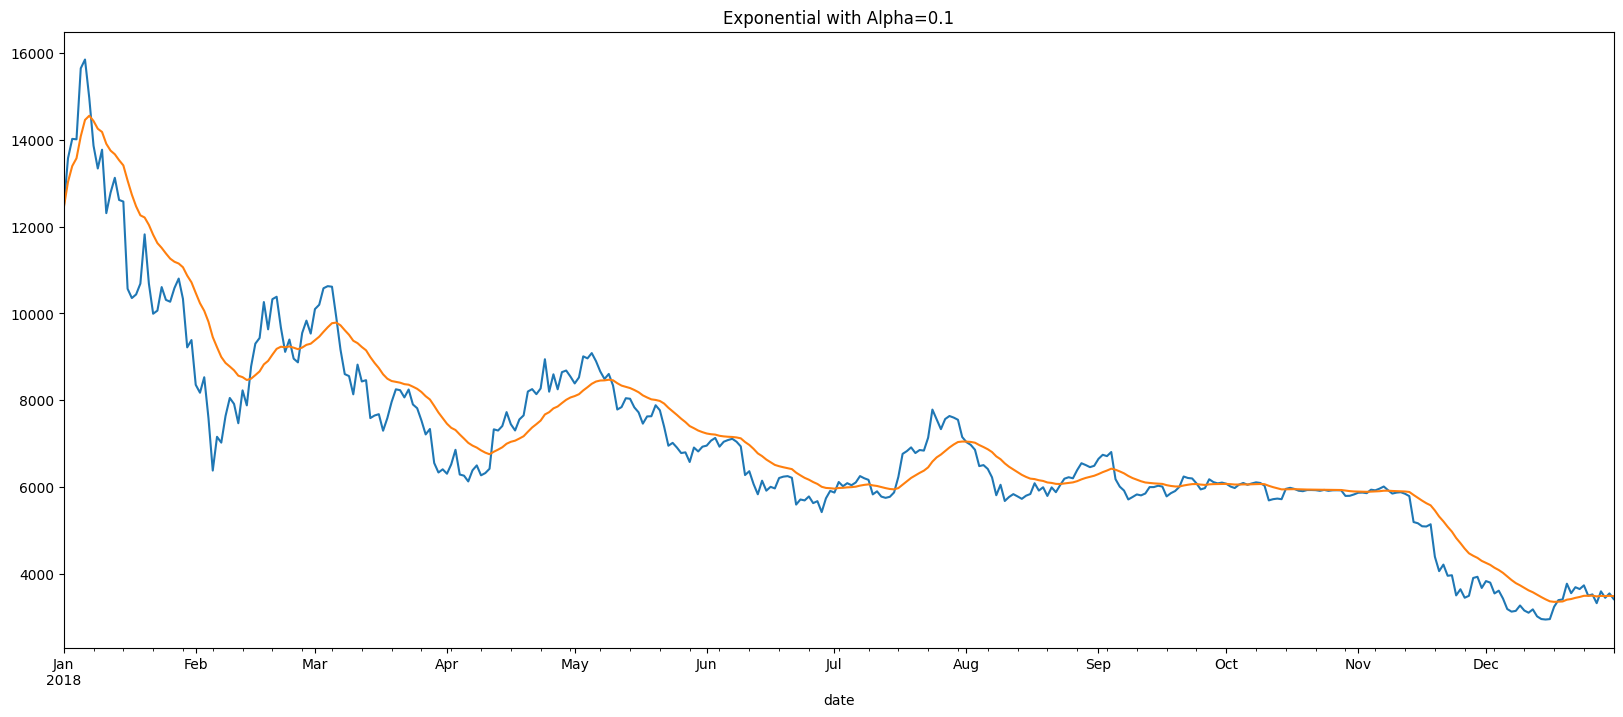

In [227]:
# Exponential smooth with alpha=0.1
bitcoin_alpha_01 = bitcoin_2018['bitcoin price'].ewm(alpha=0.1).mean()
plot_original = bitcoin_2018['bitcoin price'].plot(figsize=(20,8), title='Exponential smoothing')
plot_bitcoin_alpha_01 = bitcoin_alpha_01.plot(figsize=(20,8), title='Exponential with Alpha=0.1')

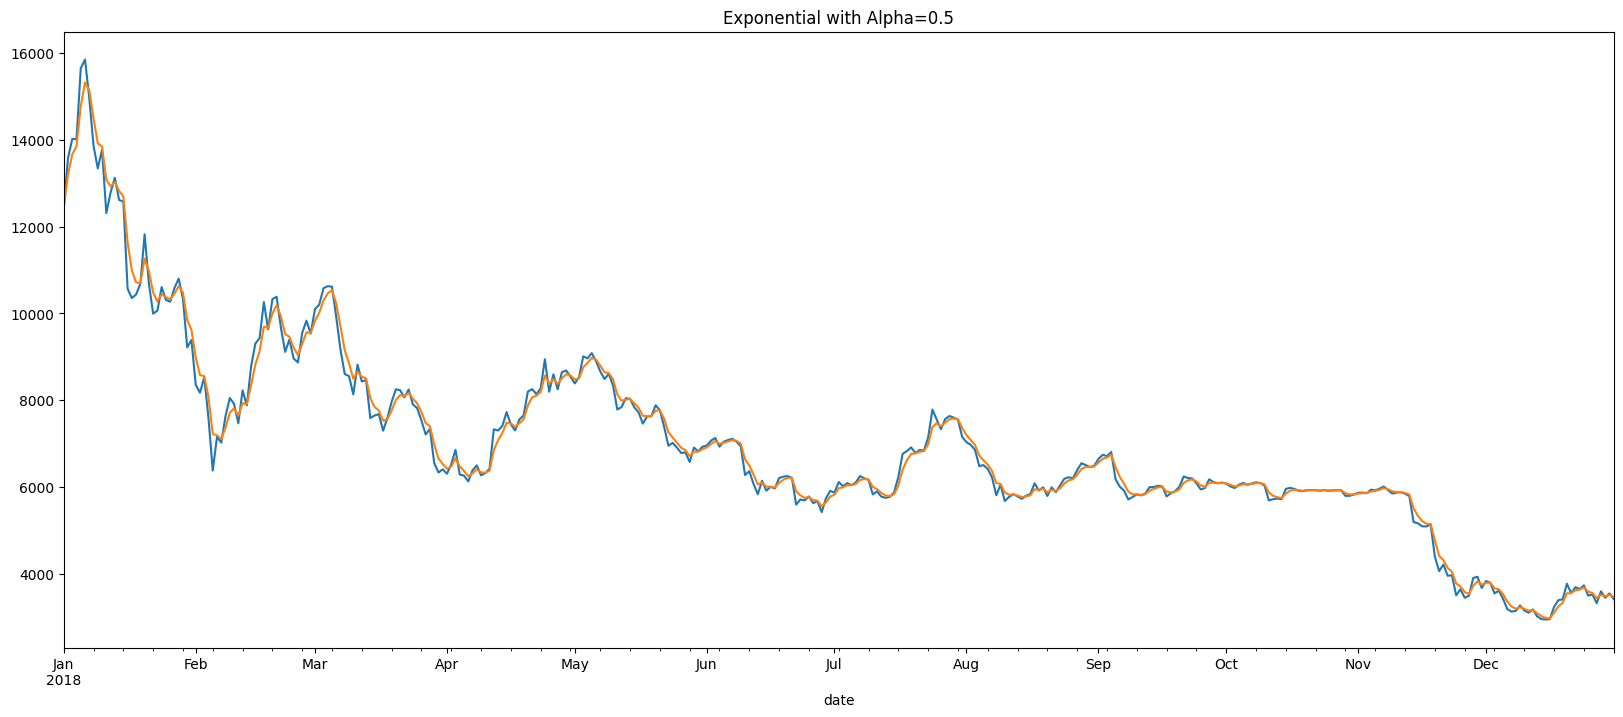

In [228]:
# Exponential smooth with alpha=0.5
bitcoin_alpha_05 = bitcoin_2018['bitcoin price'].ewm(alpha=0.5).mean()
plot_original = bitcoin_2018['bitcoin price'].plot(figsize=(20,8), title='Exponential smoothing')
plot_bitcoin_alpha_05 = bitcoin_alpha_05.plot(figsize=(20,8), title='Exponential with Alpha=0.5')

### Stationarity

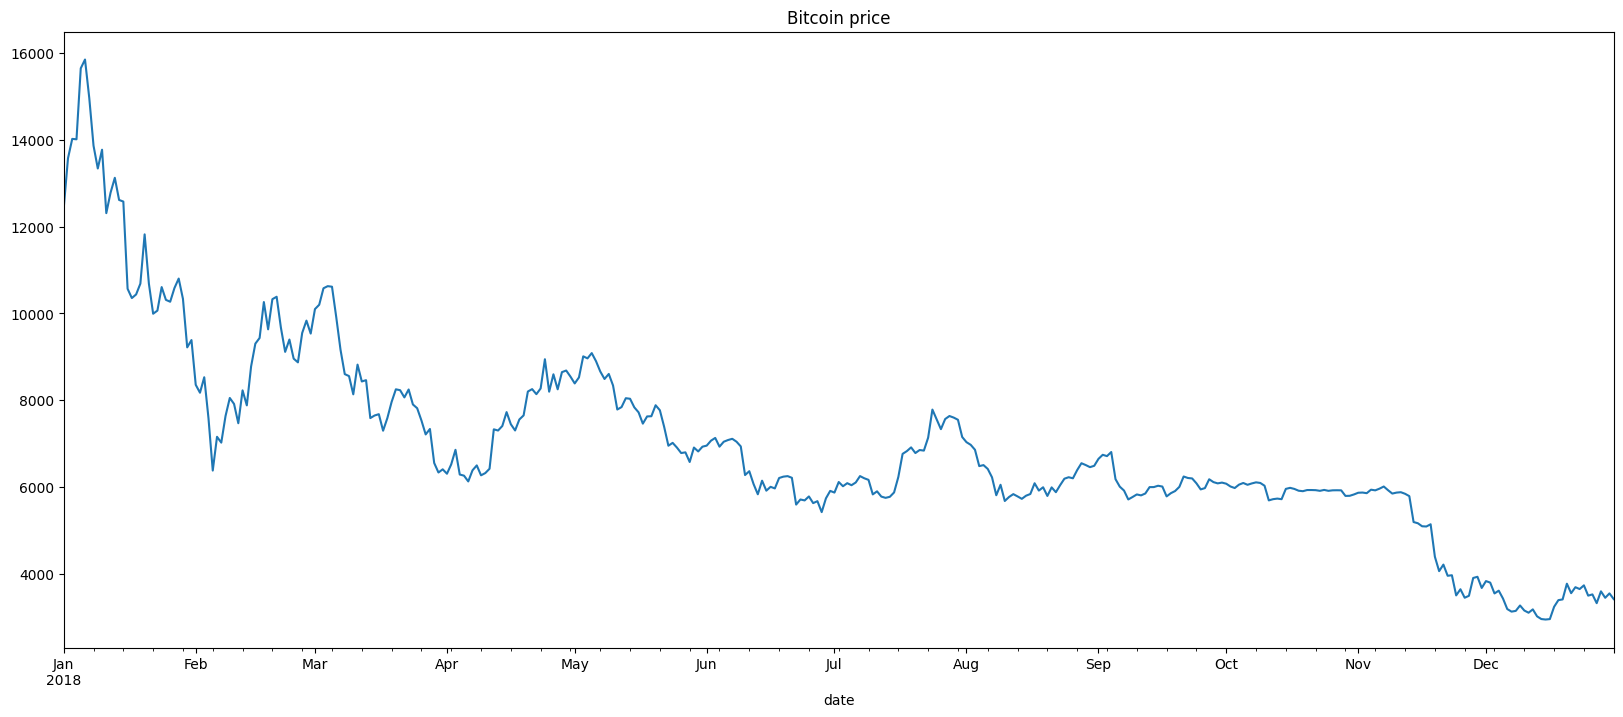

In [229]:
plot_original = bitcoin_2018['bitcoin price'].plot(figsize=(20,8), title='Bitcoin price')

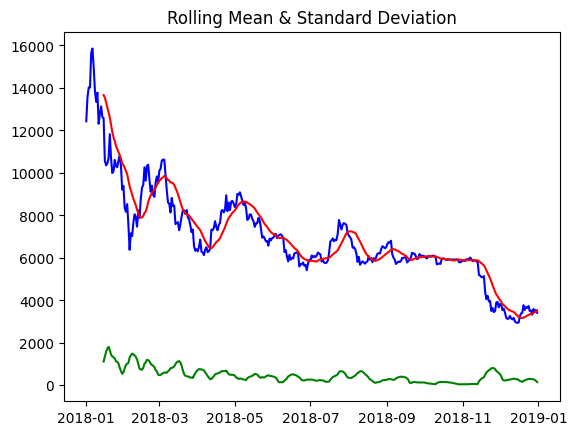

Results of Dickey-Fuller Test:
Test statistic             -2.844612
p-value                     0.052178
Lags used                  14.000000
Number of observations    350.000000
Critical Value (1%)        -3.449173
Critical Value (5%)        -2.869833
Critical Value (10%)       -2.571188
dtype: float64


In [230]:
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller

def test_stationarity(timeseries):
    # Determine rolling statistics
    movingAverage = timeseries.rolling(window=15).mean()
    movingSTD = timeseries.rolling(window=15).std()

    # Plot rolling statistics
    plt.plot(timeseries, color='blue', label='Bitcoin Data')
    plt.plot(movingAverage, color='red', label='Rolling Mean')
    plt.plot(movingSTD, color='green', label='Rolling Std')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)

    # Perform Dickey-Fuller test
    print('Results of Dickey-Fuller Test:')
    df_test = adfuller(timeseries, autolag='AIC')

    # Extract and display test results in a user friendly manner
    df_output = pd.Series(df_test[0:4], index=['Test statistic', 'p-value', 'Lags used', 'Number of observations'])
    for key, value in df_test[4].items():
        df_output['Critical Value (%s)'%key] = value
    print(df_output)

test_stationarity(bitcoin_2018['bitcoin price'])

Since the p-value is slightly greater than 0.05, we can say that the series is stationary.
But we will prove it next.

### Removing trend

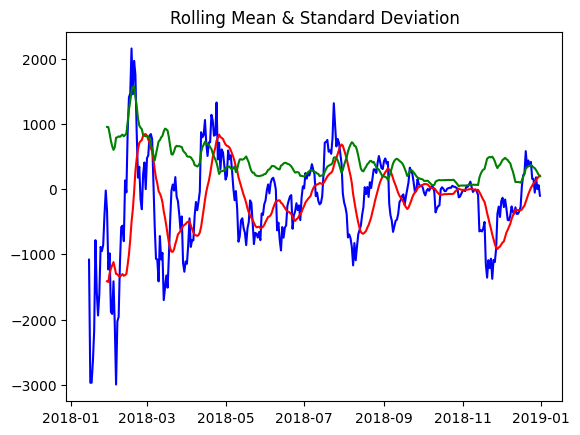

Results of Dickey-Fuller Test:
Test statistic           -5.768281e+00
p-value                   5.467498e-07
Lags used                 6.000000e+00
Number of observations    3.440000e+02
Critical Value (1%)      -3.449503e+00
Critical Value (5%)      -2.869979e+00
Critical Value (10%)     -2.571266e+00
dtype: float64


In [231]:
bitcoin_2018_without_trend = bitcoin_2018['bitcoin price'] - bitcoin_2018['bitcoin price'].rolling(window=15).mean()
bitcoin_2018_without_trend.dropna(inplace=True)

test_stationarity(bitcoin_2018_without_trend)

From the above plot, we came to know that removing partially the trend component makes the p-value ~5.467e-07, proving that the series is stationary with 95% confidence.

### Decomposition

In [232]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Perform  decomposition using the seasonal_decompose function from statsmodels
decomposition = seasonal_decompose(bitcoin_2018['bitcoin price'], model='multiplicative')

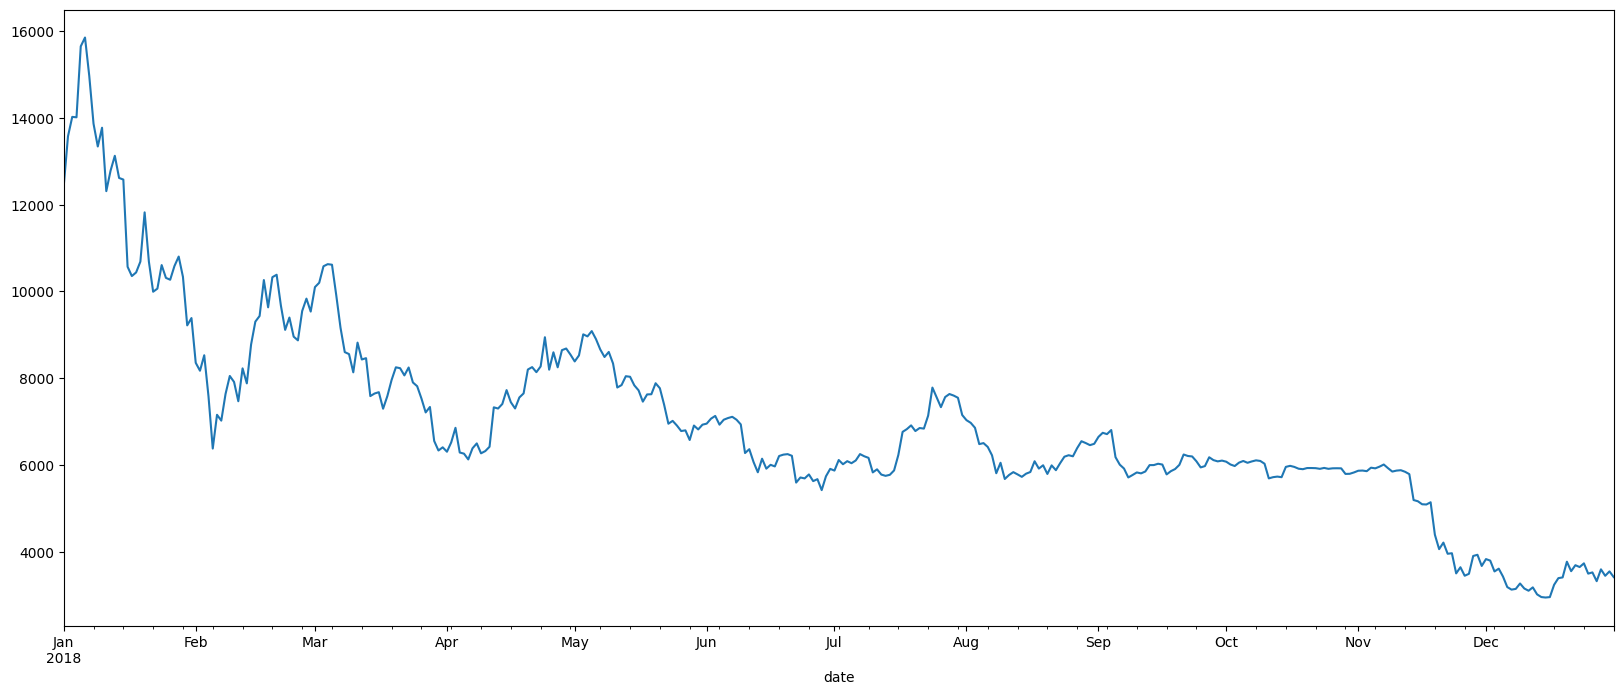

In [233]:
# Original plot
plot_original = bitcoin_2018['bitcoin price'].plot(figsize=(20,8), label='Bitcoin price')

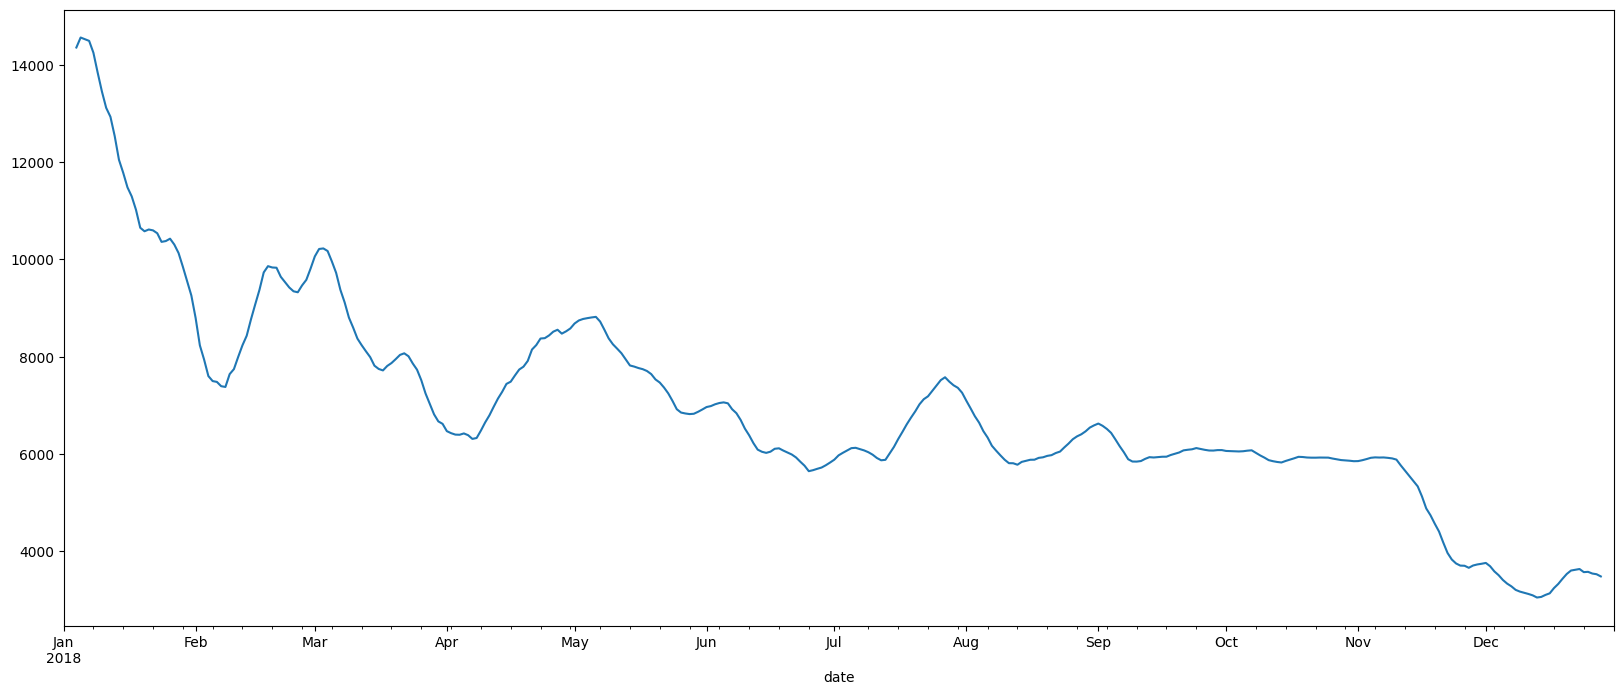

In [234]:
# Decomposition trend
plot_trend = decomposition.trend.plot(figsize=(20,8), label='Bitcoin price trend')

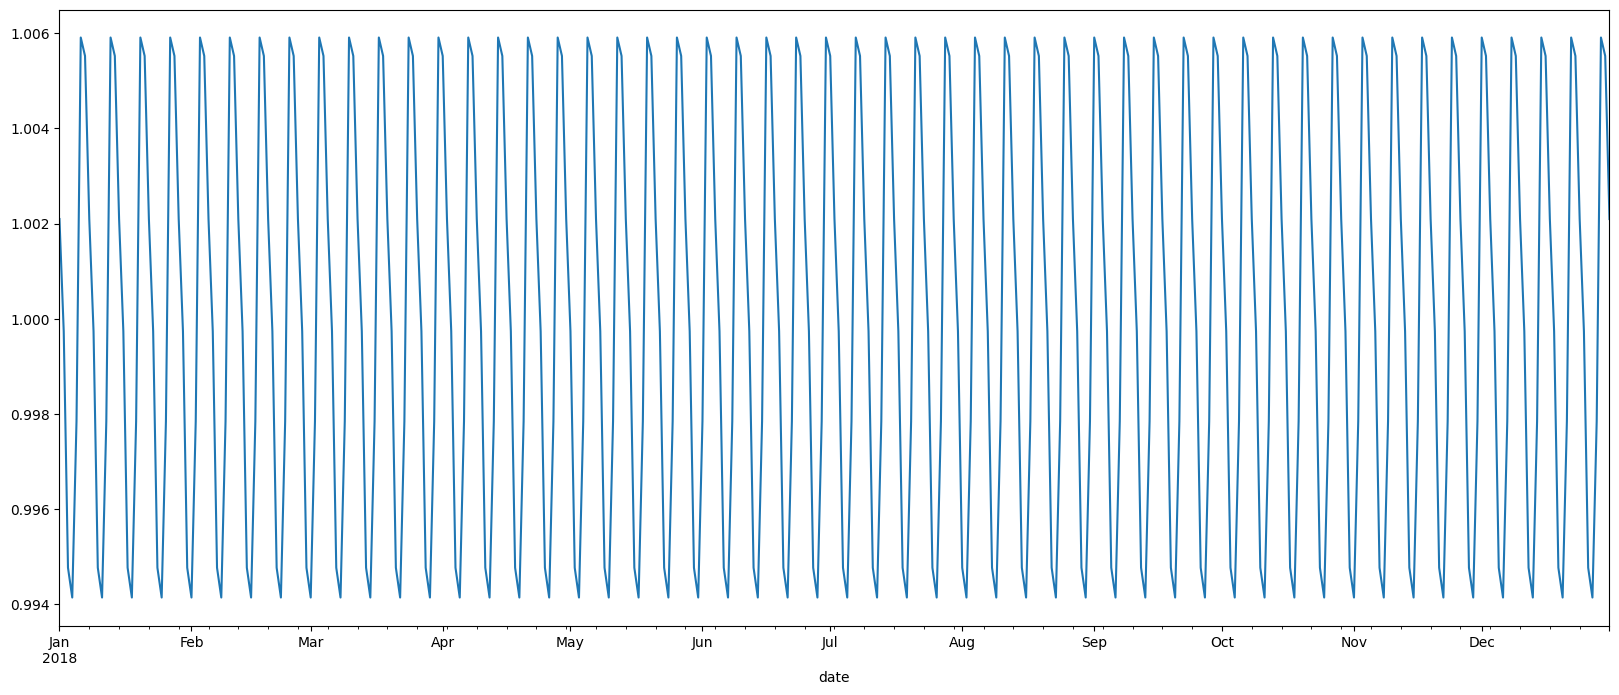

In [235]:
# Decomposition seasonal
plot_seasonal = decomposition.seasonal.plot(figsize=(20,8), label='Bitcoin price seasonal')

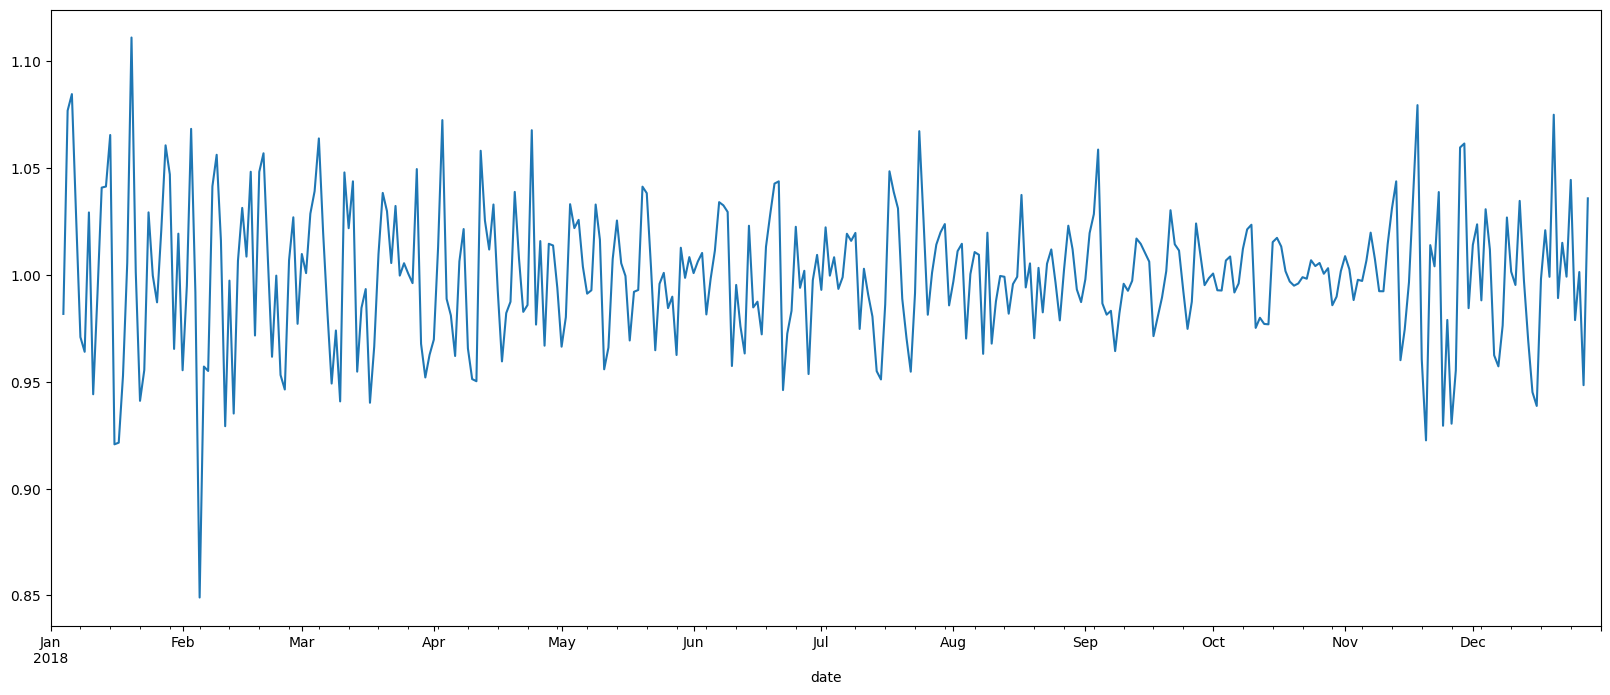

In [236]:
# Decomposition residual
plot_resid = decomposition.resid.plot(figsize=(20,8), label='Bitcoin price residual')

### Autocorrelation

Autocorrelation coefficients:
 [ 1.00000000e+00  9.75885699e-01  9.48907476e-01  9.19685245e-01
  8.89286161e-01  8.55556450e-01  8.20295783e-01  7.87644484e-01
  7.58090806e-01  7.29357250e-01  7.01276360e-01  6.77197584e-01
  6.53617447e-01  6.30004828e-01  6.08936043e-01  5.85384423e-01
  5.67524488e-01  5.51688903e-01  5.35037067e-01  5.17961556e-01
  4.96688548e-01  4.77898344e-01  4.59949617e-01  4.41542509e-01
  4.21019074e-01  4.01889348e-01  3.83748598e-01  3.67486557e-01
  3.52123026e-01  3.40034141e-01  3.34000939e-01  3.28810533e-01
  3.26050103e-01  3.25957390e-01  3.23841546e-01  3.25200593e-01
  3.29288833e-01  3.30838998e-01  3.32705969e-01  3.33842062e-01
  3.34876462e-01  3.36864781e-01  3.39398167e-01  3.39721038e-01
  3.42029710e-01  3.40478900e-01  3.36738751e-01  3.33259384e-01
  3.28394291e-01  3.25707680e-01  3.22876761e-01  3.20493547e-01
  3.19959911e-01  3.19189170e-01  3.17992526e-01  3.17977529e-01
  3.16155474e-01  3.11250678e-01  3.04092838e-01  2.9507437

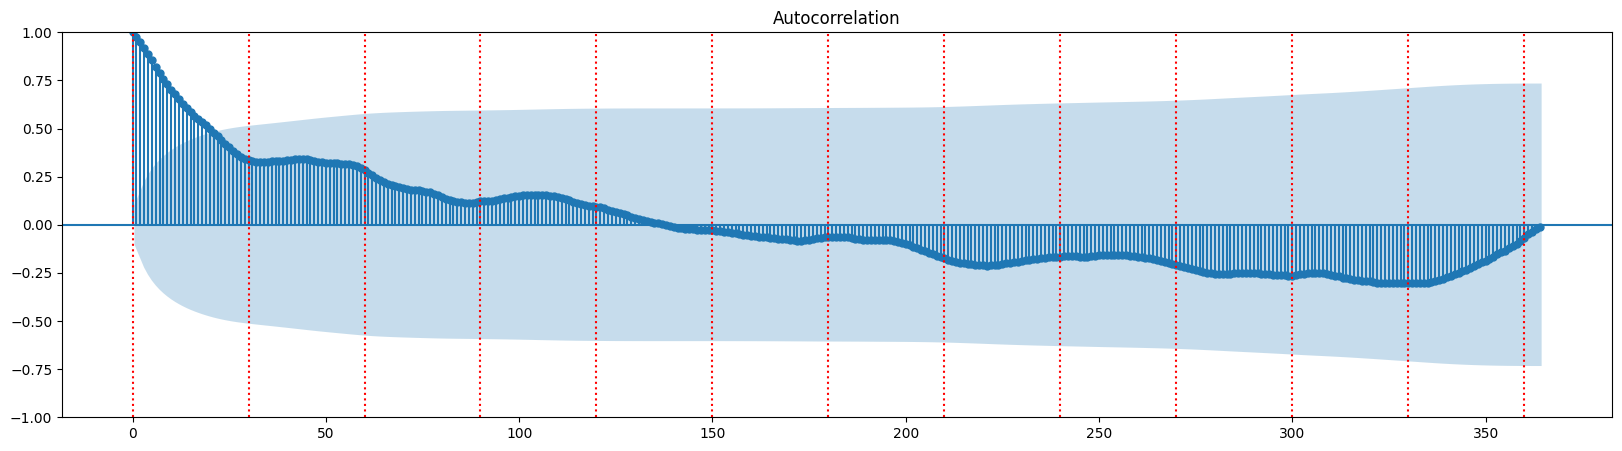

In [237]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.stattools import acf

fig, ax = plt.subplots(figsize=(20,5))

# Calculate the autocorrelation coefficients
autocorr = acf(bitcoin_2018['bitcoin price'], nlags=364)
print('Autocorrelation coefficients:\n', autocorr)

# Plot the autocorrelation function
plot_acf(bitcoin_2018['bitcoin price'], ax=ax, lags=364)

# plot vertical dashed red lines at each month
for date in range(0, 364, 30):
        ax.axvline(date, color="red", linestyle=":")

plt.show()

With just data from 2018 we cannot really detect cyclical changes.

### Spectral analysis

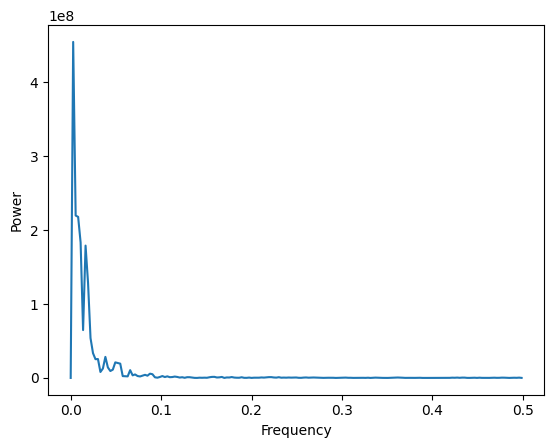

In [238]:
from scipy.signal import periodogram
import numpy as np

freq, power = periodogram(bitcoin_2018['bitcoin price'])

# Plot the power spectrum
plt.plot(freq, power)
plt.xlabel('Frequency')
plt.ylabel('Power')
plt.show()

In [239]:
peak_freq = freq[np.where(power > 1180000)]
print('peak value', peak_freq)
print('periodicity', 1/peak_freq)

peak value [0.00273973 0.00547945 0.00821918 0.0109589  0.01369863 0.01643836
 0.01917808 0.02191781 0.02465753 0.02739726 0.03013699 0.03287671
 0.03561644 0.03835616 0.04109589 0.04383562 0.04657534 0.04931507
 0.05205479 0.05479452 0.05753425 0.06027397 0.0630137  0.06575342
 0.06849315 0.07123288 0.0739726  0.07671233 0.07945205 0.08219178
 0.08493151 0.08767123 0.09041096 0.09863014 0.10136986 0.10410959
 0.10684932 0.11232877 0.11506849 0.11780822 0.15616438 0.15890411
 0.16712329]
periodicity [365.         182.5        121.66666667  91.25        73.
  60.83333333  52.14285714  45.625       40.55555556  36.5
  33.18181818  30.41666667  28.07692308  26.07142857  24.33333333
  22.8125      21.47058824  20.27777778  19.21052632  18.25
  17.38095238  16.59090909  15.86956522  15.20833333  14.6
  14.03846154  13.51851852  13.03571429  12.5862069   12.16666667
  11.77419355  11.40625     11.06060606  10.13888889   9.86486486
   9.60526316   9.35897436   8.90243902   8.69047619   8.4883

### Clustering

In [240]:
from sklearn.cluster import KMeans

# compute the variation of the bitcoin price over the quarters
bitcoin_2018_price_quarter = bitcoin_2018.resample('7D').first()

# Clustering using K-Means
kmeans = KMeans(n_clusters=53, random_state=0, n_init=10).fit(bitcoin_2018_price_quarter)
clusters = kmeans.predict(bitcoin_2018_price_quarter)
# clusters

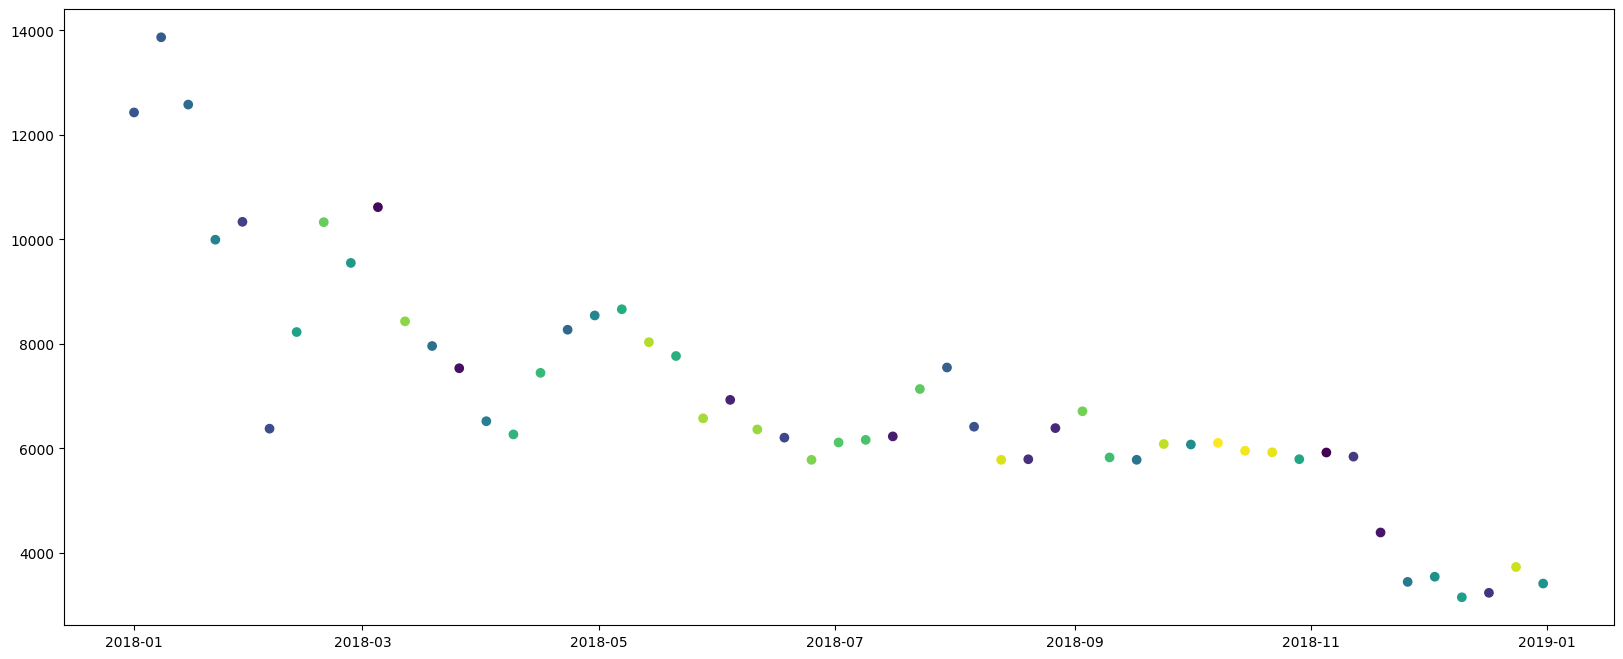

In [241]:
fig, ax = plt.subplots(figsize=(20,8))
ax.scatter(bitcoin_2018_price_quarter.index, bitcoin_2018_price_quarter['bitcoin price'], c=clusters, cmap='viridis')

### Correlation

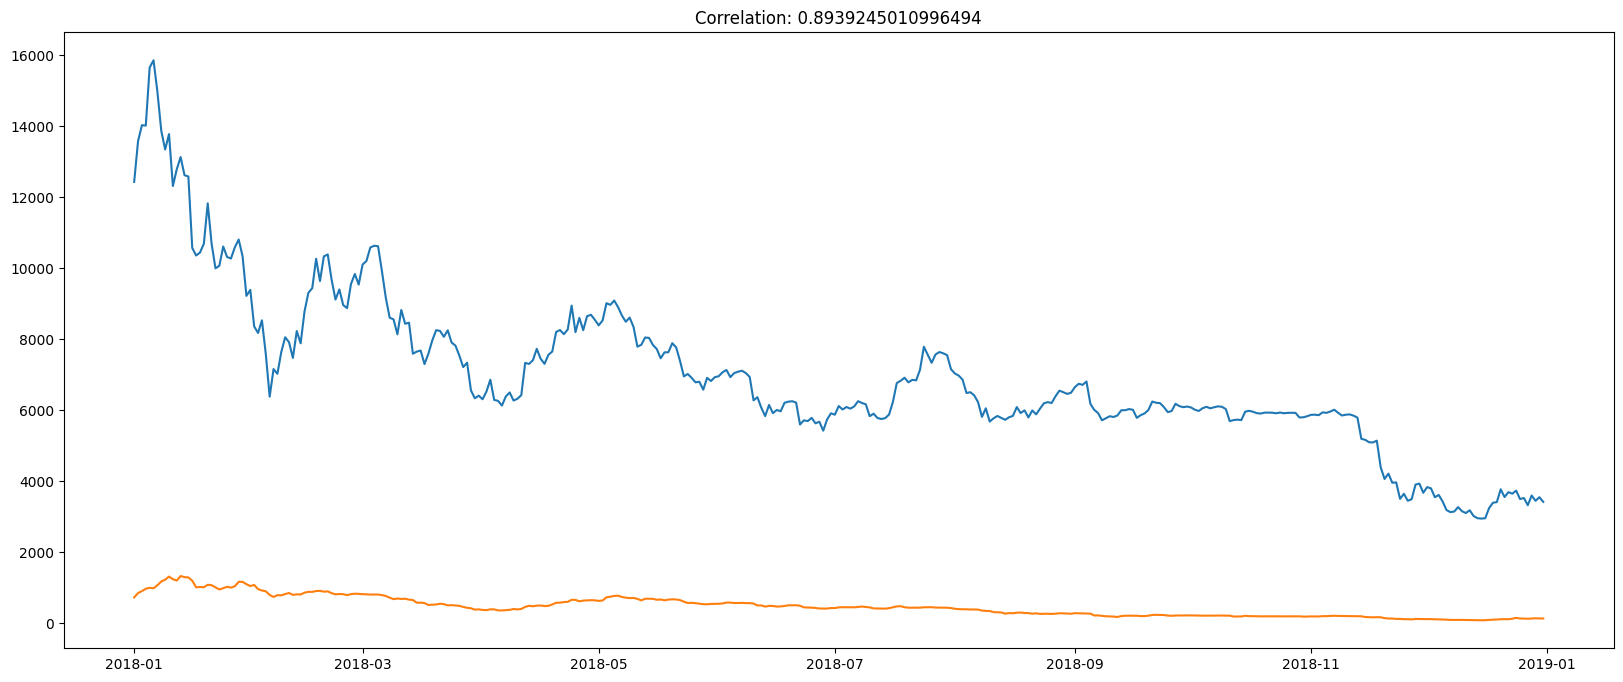

In [242]:
# Calculate cross-correlation between Bitcoin and Ethereum
dataframe = pd.concat([bitcoin_2018, ethereum_2018], axis=1)
corr = dataframe['bitcoin price'].corr(dataframe['ethereum price'])

# Plot time series data
plt.figure(figsize=(20,8))

plt.plot(dataframe.index, dataframe['bitcoin price'], label='Bitcoin price')
plt.plot(dataframe.index, dataframe['ethereum price'], label='Ethereum price')
plt.title('Correlation: ' + str(corr))
plt.show()

[0.7371725025514282, 0.743411858392932, 0.7521552074660101, 0.7621188590747952, 0.7724641884259719, 0.7812508361030204, 0.7892426871779467, 0.7985318497293418, 0.8053271887930554, 0.8111967991176564, 0.8167327909027664, 0.8217799119219549, 0.8256906571919511, 0.8297110038235757, 0.8343400136857931, 0.8406543043119531, 0.845653275800447, 0.8510500632155519, 0.8578690377672641, 0.8661067738368039, 0.8750812947197232, 0.8836812052399673, 0.8922237697470333, 0.8980396655303935, 0.9023851843429163, 0.905007167143191, 0.9064987703089465, 0.9071877839978902, 0.9055167632653269, 0.90433822399394, 0.8939245010996494, 0.8799766310975676, 0.869230024909543, 0.8583292989154655, 0.8488311442684597, 0.8458532707165489, 0.8425601301159086, 0.8378965659295721, 0.83179082280627, 0.8272680007433137, 0.8260101920790374, 0.820601455433914, 0.8158387745292013, 0.8135916494704127, 0.8094347894545736, 0.807121037297086, 0.7993820495368936, 0.7899196084881558, 0.7806305999925766, 0.7700295445246154, 0.7600147

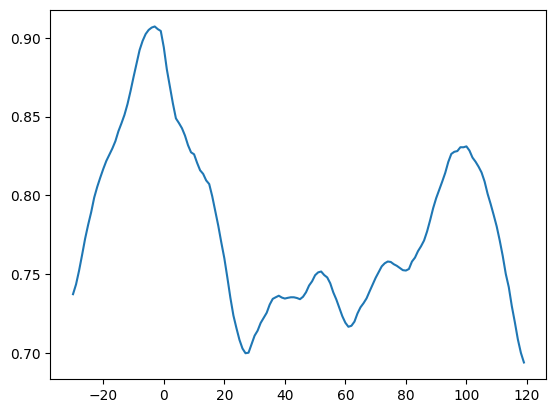

In [243]:
# Compute cross-correlation between Bitcoin and Ethereum
list_of_lags = range(-30, 120)

cross_corr = [dataframe['bitcoin price'].corr(dataframe['ethereum price'].shift(lag)) for lag in list_of_lags]
print(cross_corr)

plt.plot(list_of_lags, cross_corr)

## Anomaly detection
---

In [244]:
import pandas as pd
from sklearn.impute import SimpleImputer

# Gather data from all years and simplify it
bitcoin_2017 = pd.read_csv("datasets/BTC-2017min.csv")
bitcoin_2018 = pd.read_csv("datasets/BTC-2018min.csv")
bitcoin_2019 = pd.read_csv("datasets/BTC-2019min.csv")
bitcoin_2020 = pd.read_csv("datasets/BTC-2020min.csv")
bitcoin_2021 = pd.read_csv("datasets/BTC-2021min.csv")

dataframe = pd.concat([bitcoin_2017, bitcoin_2018, bitcoin_2019, bitcoin_2020, bitcoin_2021], axis=0, join="inner")

dataframe = dataframe.drop(['unix'], axis = 1)
dataframe = dataframe.drop(['symbol'], axis = 1)

dataframe['date'] = pd.to_datetime(dataframe['date'])
dataframe = dataframe.set_index('date')

dataframe.rename(columns = {'high': 'price', 'Volume BTC': 'volume', 'Volume USD': 'euro'}, inplace = True)
dataframe = dataframe.drop(['open', 'low', 'close', 'euro'], axis = 1)

dataframe['price'] = dataframe['price'] * 0.924428

In [245]:
# Fill nan with mean value
dataframe.dropna(inplace=True)
dataframe = dataframe.resample('D').mean()
dataframe.fillna(method='ffill', inplace=True)

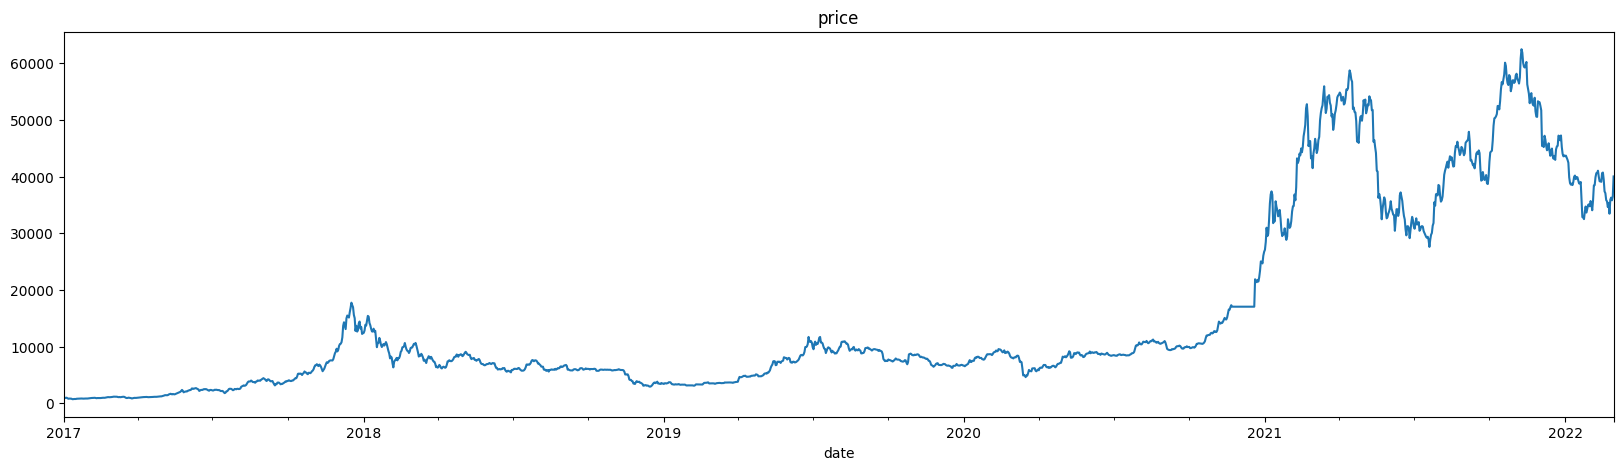

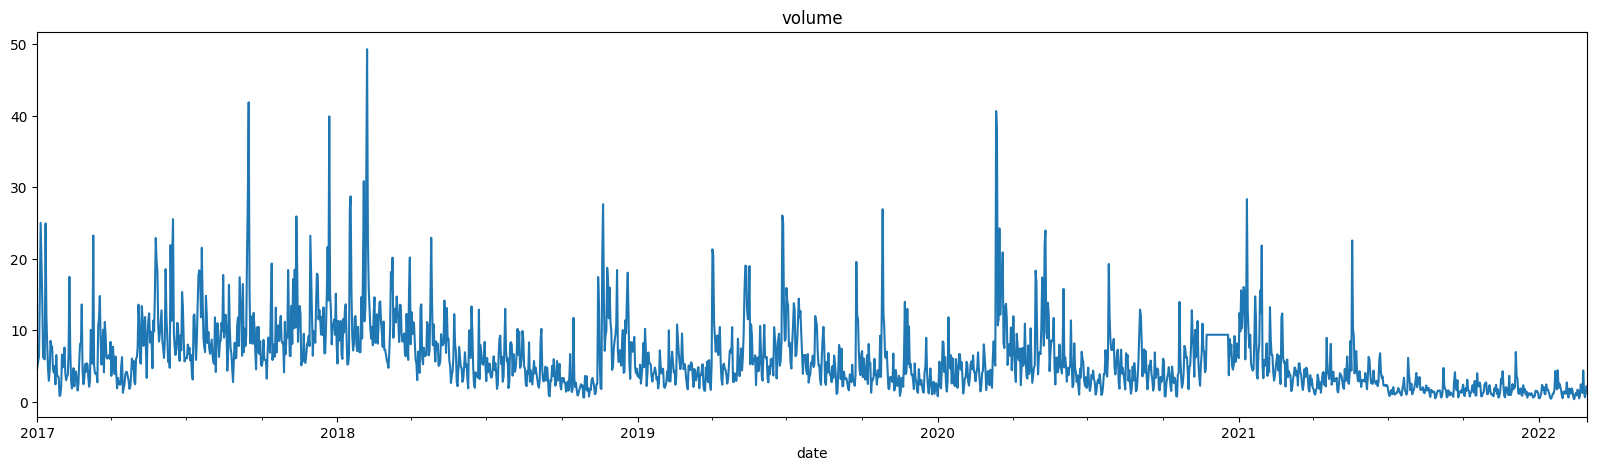

In [292]:
# Plot the dataframe for each column
for col in dataframe.columns:
    dataframe[col].plot(title=col, figsize=(20, 5))
    plt.show()

#### Z Score

In [344]:
def my_zscore(serie):
    mean = serie.mean()
    std = serie.std()

    return (serie - mean) / std

dataframe_price_zscore = my_zscore(dataframe['price'])

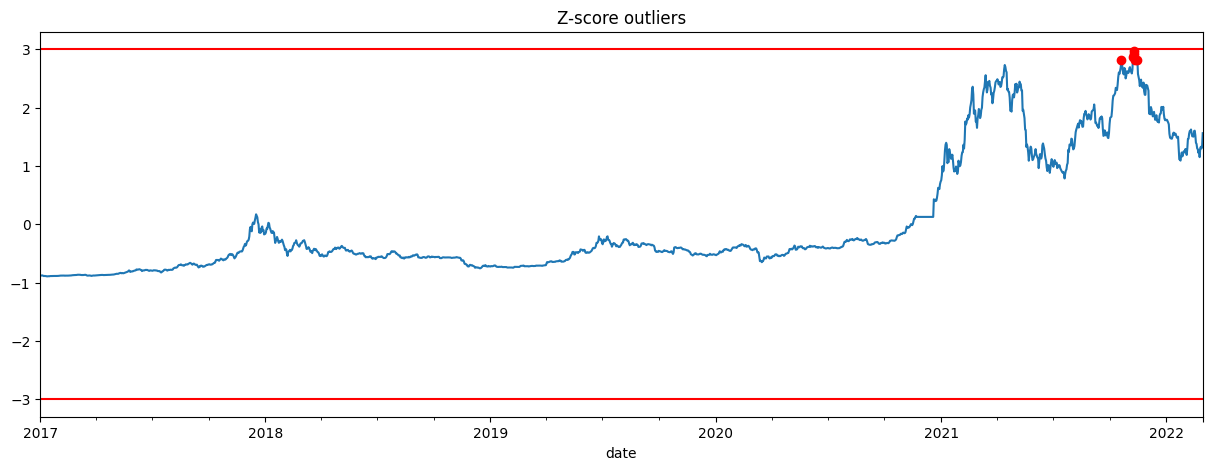

In [345]:
# Plot the price column marking the outliers with a different color
dataframe_price_zscore.plot(title='Z-Score', figsize=(20, 5))

# Get the readings with z-score > 2.8 or < -2.8
mask = (dataframe_price_zscore > 2.8) | (dataframe_price_zscore < -2.8)
dataframe_price_zscore[mask].plot(style='ro', title='Z-score outliers', figsize=(15, 5))

plt.axhline(y=3, color='r', linestyle='-')
plt.axhline(y=-3, color='r', linestyle='-')

#### Exponential moving average

In [346]:
alpha = 0.90
threshold = 3

dataframe_price = dataframe['price']
dataframe_price_smooth = pd.DataFrame(index=dataframe_price.index, columns=['price', 'price smooth'], dtype='float64')
dataframe_price_smooth['price'] = dataframe_price.copy()
dataframe_price_smooth['price smooth'] = dataframe_price.copy()

for t_minus_1, t in zip(dataframe_price_smooth.index[:-1], dataframe_price_smooth.index[1:]):
    dataframe_price_smooth.loc[t, 'price smooth'] = alpha * dataframe_price_smooth.loc[t, 'price'] + (1-alpha) * dataframe_price_smooth.loc[t_minus_1, 'price smooth']


dataframe_price_smooth.tail()

,price,price smooth
date,,
2022-02-25,35923.804820,35694.121639
2022-02-26,36281.230104,36222.519258
2022-02-27,35808.105941,35849.547273
2022-02-28,36463.997500,36402.552477
2022-03-01,40015.827633,39654.500117


<Axes: xlabel='date'>

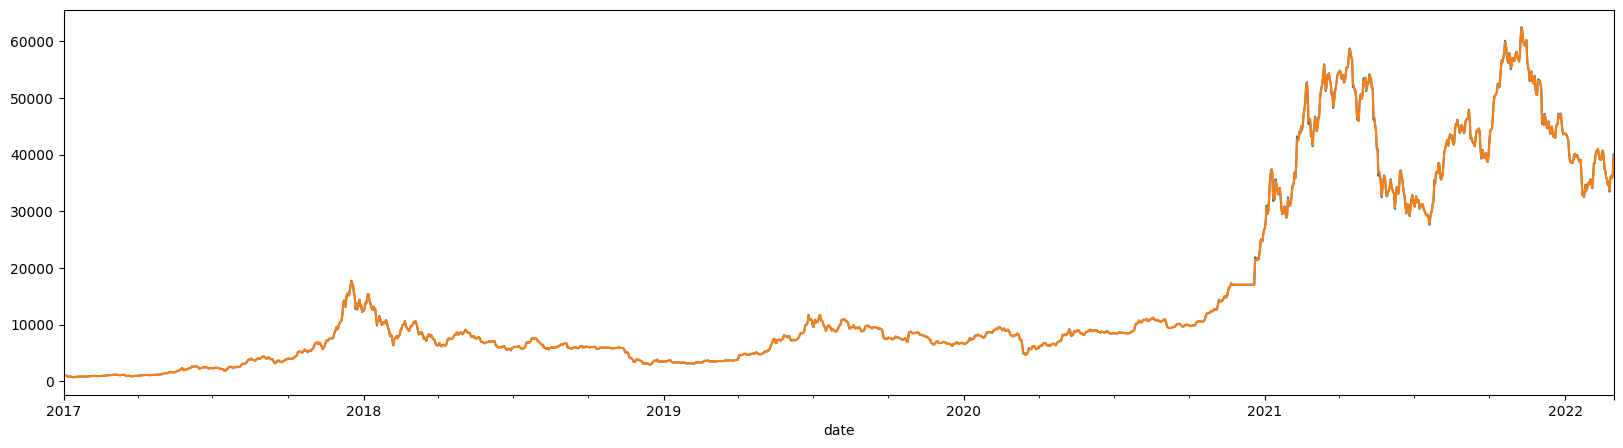

In [355]:
# Plot smoothed price
dataframe_price_smooth['price'].plot(figsize=(20, 5))
dataframe_price_smooth['price smooth'].plot(figsize=(20, 5))

In [356]:
# Calculate the deviation
dataframe_price_smooth['deviation'] = dataframe_price_smooth['price'] - dataframe_price_smooth['price smooth']

# Calculate the standard deviation of the deviations
std_dev = dataframe_price_smooth['deviation'].std()

# Identify anomalies - those points whose absolute deviation exceeds threshold x standard deviations
mask = (dataframe_price_smooth['deviation'] < -threshold) | (dataframe_price_smooth['deviation'] > threshold)
potential_outliers = dataframe_price_smooth.loc[mask, 'price']

print("Potential anomalies:")
potential_outliers

Potential anomalies:


date
2017-01-04      995.859630
2017-01-06      864.727689
2017-01-07      804.899890
2017-01-11      783.273828
2017-01-12      724.328485
                  ...     
2022-02-25    35923.804820
2022-02-26    36281.230104
2022-02-27    35808.105941
2022-02-28    36463.997500
2022-03-01    40015.827633
Name: price, Length: 1318, dtype: float64

<Axes: title={'center': 'Price outliers'}, xlabel='date'>

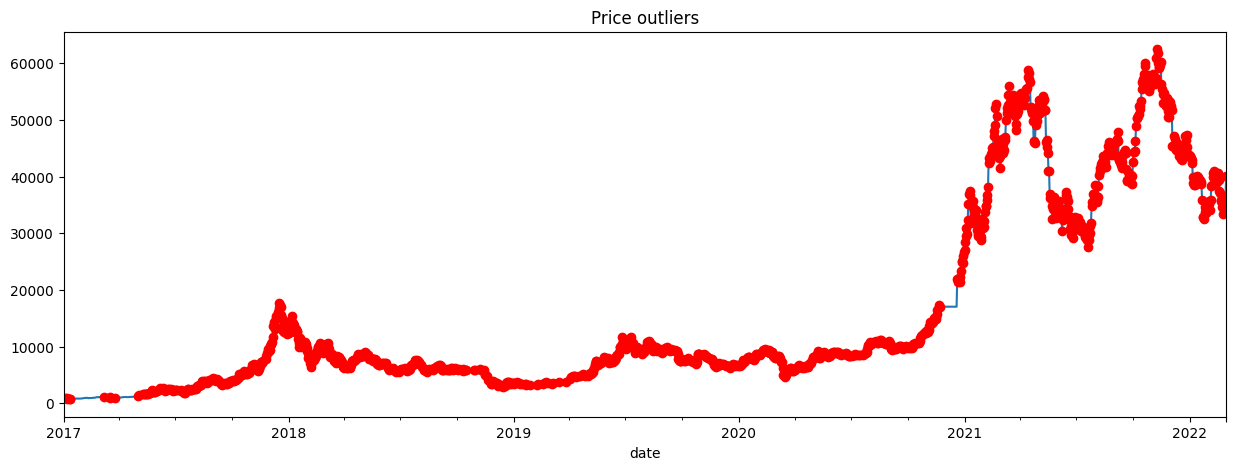

In [357]:
# Plot the price column marking the outliers with a different color
dataframe_price.plot(title='Price', figsize=(15, 5))
dataframe_price.loc[potential_outliers.index].plot(style='ro', title='Price outliers', figsize=(15, 5))

#### Modified Z score

In [358]:
from math import fabs

def modified_z_score(serie, threshold=3):
    # calculate median absolute deviation
    median = serie.median()
    mad = (serie - median).apply(fabs).median()

    print(f'median: {median}')
    print(f'MAD: {mad}')

    # calculate modified Z-scores for each data point
    m_z_scores = 0.6745 * (serie - median) / mad

    # identify data points above threshold as potential outliers
    mask = (m_z_scores < -threshold) | (m_z_scores > threshold)
    potential_outliers = serie[mask]

    return potential_outliers

In [359]:
threshold = 5
potential_outliers = modified_z_score(dataframe_price, threshold)

print("Potential outliers:")
potential_outliers

median: 8126.324079909153
MAD: 3892.9301403942636
Potential outliers:


date
2021-01-09    37380.524503
2021-02-08    38122.051772
2021-02-09    43204.191472
2021-02-10    42377.805924
2021-02-11    42815.111834
                  ...     
2022-02-16    40700.557181
2022-02-17    39450.065014
2022-02-18    37382.834829
2022-02-19    37062.521220
2022-03-01    40015.827633
Name: price, Length: 288, dtype: float64

<Axes: title={'center': 'Bitcoin price outliers'}, xlabel='date'>

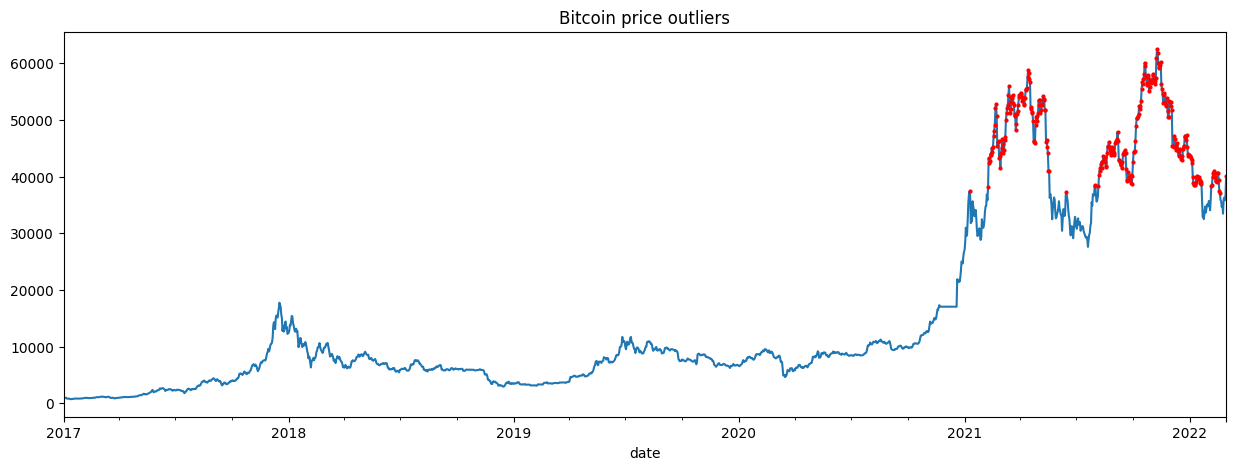

In [360]:
# Plot the price column marking the outliers with a different color
ax = dataframe_price.plot(title='Bitcoin price', figsize=(15, 5))
potential_outliers.plot(style='ro', title='Bitcoin price outliers', figsize=(15, 5), markersize=2, ax=ax)

#### Isolation forest

In [385]:
from sklearn.ensemble import IsolationForest

# Fit the model
model = IsolationForest(contamination=0.05)
model.fit(dataframe_price.values.reshape(-1, 1))

# Get the predictions
predictions = model.predict(dataframe_price.values.reshape(-1, 1))

# Get the outliers
mask = predictions == -1
potential_outliers = dataframe_price[mask]

print("Potential outliers:")
potential_outliers

Potential outliers:


date
2017-12-12    15486.756114
2017-12-15    16069.057285
2017-12-17    17753.232356
2017-12-20    15592.224291
2018-01-06    15422.063956
                  ...     
2021-11-17    55400.933538
2021-11-18    54597.743801
2021-11-20    54298.334643
2021-11-21    54713.987657
2021-11-25    53896.384720
Name: price, Length: 95, dtype: float64

<Axes: title={'center': 'Bitcoin price outliers'}, xlabel='date'>

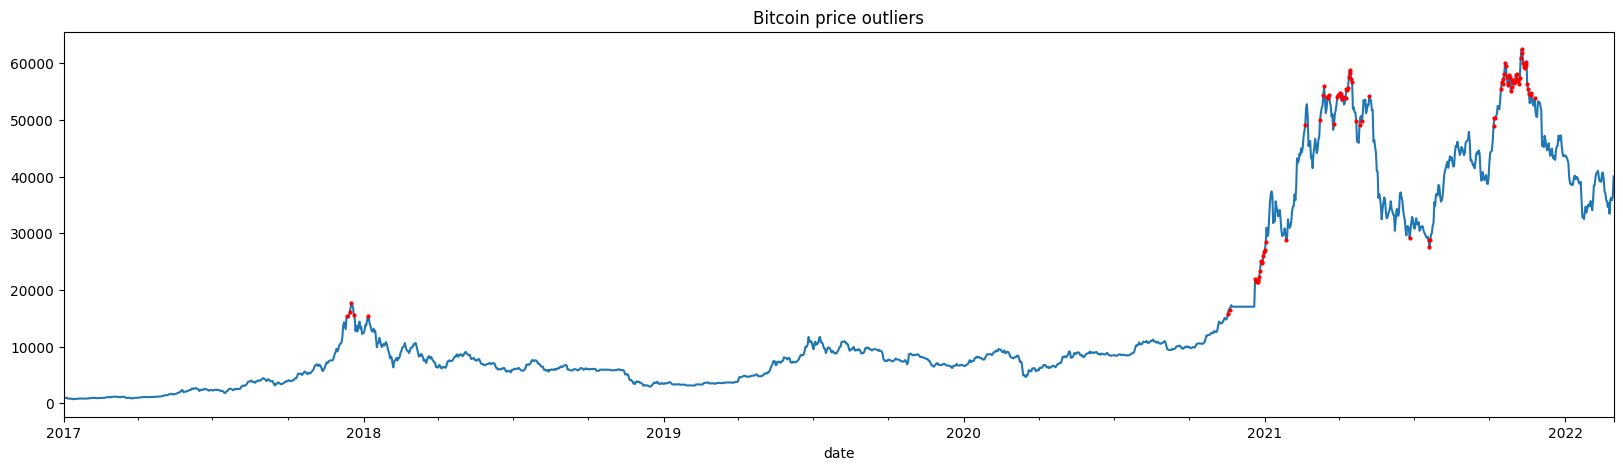

In [386]:
# Plot the predictions
ax = dataframe_price.plot(title='Bitcoin price', figsize=(20, 5))
potential_outliers.plot(style='ro', title='Bitcoin price outliers', figsize=(20, 5), markersize=2, ax=ax)